# ARIMA, SARIMA, and Facebook Prophet Lecture Code:
The general process of the code is as follows:
- Load the dataset and explore it
- Test it's seasonlaity and decide which model is best suited
- Plot all 3 models to test initial assumption from data's plot

# Importing Libraries and Exploring my data

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install prophet
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [38]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, index_col='Month' , parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


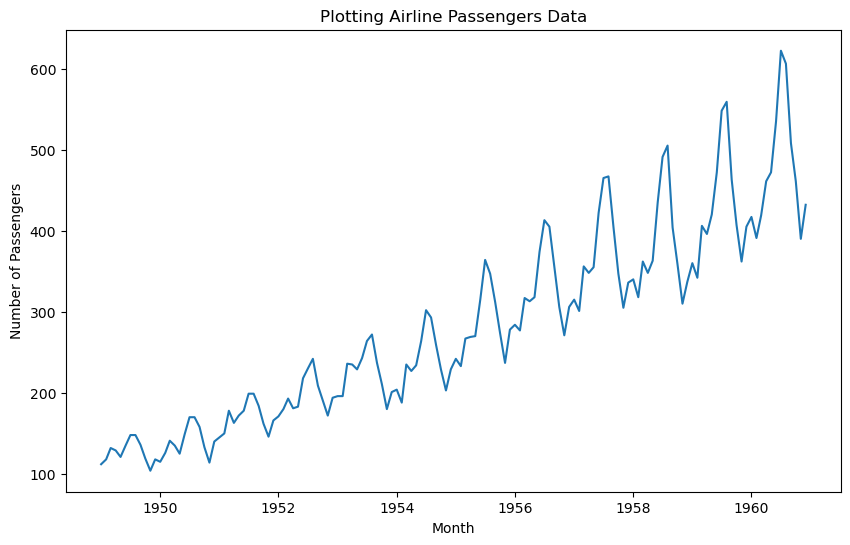

In [39]:
#Plotting my Timeseries data:
plt.figure(figsize=(10,6))
plt.plot(df)
plt.title('Plotting Airline Passengers Data')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.show()

## PopUp Question: Does this look like Stationary or Seasonal Timeseries data??

# Testing Stationarity using ADF (Augmented Dickey-Fuller) test:
--> The ADF (Augmented Dickey-Fuller) test is used to see if a time series is stationary or not?

**The Hypothesis:** The test has a null hypothesis that the data is NOT stationary. 

**Alternative hypothesis:** is that the data IS stationary.

In [40]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Passengers'])

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

adfuller_test(df['Passengers'])

ADF Test Statistic : 0.8153688792060416
p-value : 0.9918802434376409
#Lags Used : 13
Number of Observations Used : 130
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# SARIMA Model

/Users/safianaif/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/safianaif/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.52844D+00    |proj g|=  8.65844D-02

At iterate    5    f=  3.52337D+00    |proj g|=  3.73532D-02

At iterate   10    f=  3.51577D+00    |proj g|=  4.96153D-03

At iterate   15    f=  3.51498D+00    |proj g|=  1.97617D-03

At iterate   20    f=  3.51493D+00    |proj g|=  7.00878D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     27      1     0     0   3.212D-05   3.515D+00
  F =   3.5149263632456407     

CONVERG

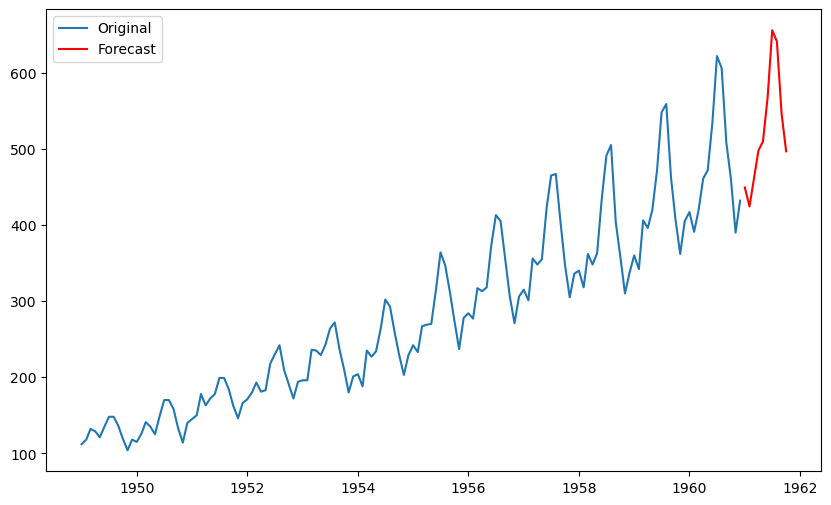

In [41]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
sdata = pd.read_csv(url, index_col='Month' , parse_dates=True)

#Define SARIMA Model
sarima_model = SARIMAX(sdata, order=(1,1,1), seasonal_order=(1,1,1,12))

#Fit the model
sarima_model_fit = sarima_model.fit()

#Summary of SARIMA Model
print(sarima_model_fit.summary())

#forecast future values using my model
sarima_forecast = sarima_model_fit.forecast(steps=10) #AKA 10 Months


#Plot the forecast
plt.figure(figsize=(10,6))
plt.plot(df, label='Original')
plt.plot(sarima_forecast, label = 'Forecast', color='red')
plt.legend()
plt.show()

# Facebook Prophet Model

16:22:02 - cmdstanpy - INFO - Chain [1] start processing
16:22:02 - cmdstanpy - INFO - Chain [1] done processing


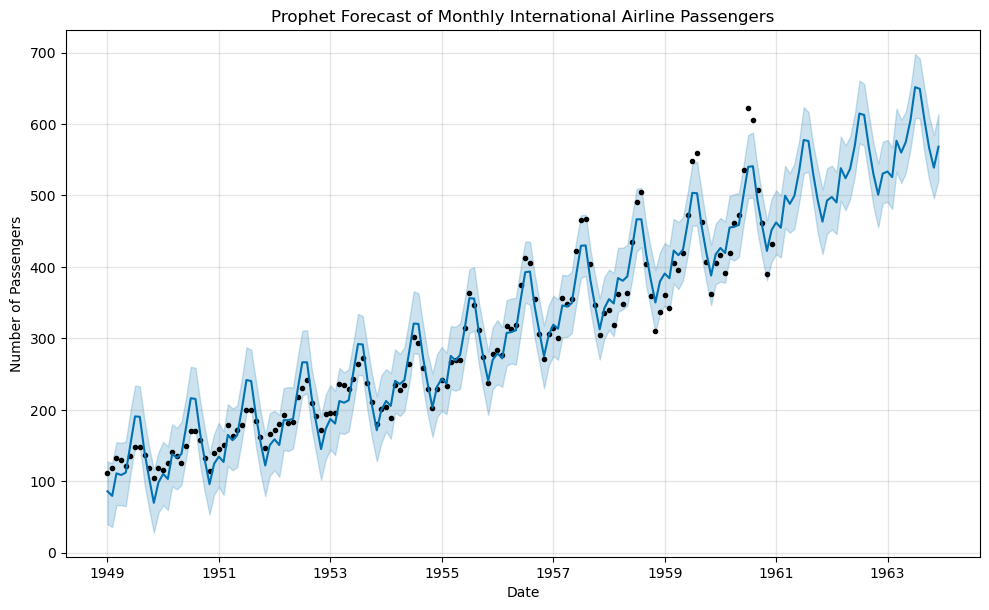

In [42]:
from prophet import Prophet
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
fdata = pd.read_csv(url)

# Rename columns to fit Prophet's expected format
fdata.columns = ['ds', 'y']

# Define the Prophet model with custom parameters
model = Prophet(
    growth='linear', #'linear' for a linear trend or 'logistic' for a logistic growth trend.
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='additive',
    interval_width=0.95
)

# Fit the model
model.fit(fdata)

# Make a future dataframe for 36 months
future = model.make_future_dataframe(periods=36, freq='M')

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Prophet Forecast of Monthly International Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()


**Black Dots:** Actual data points from the dataset.

**Blue Line:** Predicted values by the Prophet model.

**Light Blue Shaded Area:** Uncertainty intervals around the predictions, indicating the model's confidence range

# ARIMA Model


## Differencing

### **First Differencing**

Used to remove the trend by subtracting the previous value from the current value.

In [43]:
df['Passengers First Difference'] = df['Passengers'] - df['Passengers'].shift(1)
df['Passengers'].shift(1)

Month
1949-01-01      NaN
1949-02-01    112.0
1949-03-01    118.0
1949-04-01    132.0
1949-05-01    129.0
              ...  
1960-08-01    622.0
1960-09-01    606.0
1960-10-01    508.0
1960-11-01    461.0
1960-12-01    390.0
Name: Passengers, Length: 144, dtype: float64

### **Seasonal Differencing**

Used to remove seasonality by subtracting the value from the same month of the previous year.

In [44]:
df['Seasonal First Difference']=df['Passengers']-df['Passengers'].shift(12)

## Retake the ADF test after differencing:

In [45]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.38302072649248
p-value : 0.011551493085515008
#Lags Used : 1
Number of Observations Used : 130
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## Plotting the ARIMA Model

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Sun, 21 Jul 2024   AIC                           1394.683
Time:                        16:22:02   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

/Users/safianaif/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/safianaif/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/safianaif/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


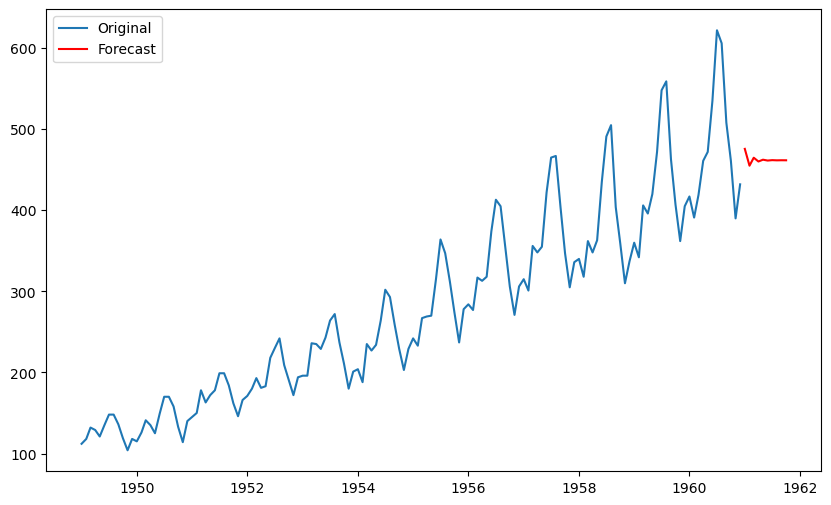

In [46]:
#url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
#adata = pd.read_csv(url, index_col='Month' , parse_dates=True)

aadf = df['Passengers']
#Define ARIMA Model
arima_model = ARIMA(aadf, order=(1,1,1))


#Fit the ARIMA model
arima_model_fit = arima_model.fit()


#Summary of the ARIMA Model
print(arima_model_fit.summary())


#Forecasting future values:
arima_model_forecast = arima_model_fit.forecast(steps=10) #AKA 10 Months

#Plot the forecast along with original data
plt.figure(figsize=(10,6))
plt.plot(adata, label='Original')
plt.plot(arima_model_forecast, label='Forecast', color='red')
plt.legend()
plt.show()